![header](images/header.png)

[![pypi version](https://img.shields.io/pypi/v/fibermat?logo=pypi)](https://pypi.org/project/fibermat/)
[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT)
[![François Mahé](https://img.shields.io/badge/Author-François%20Mahé-green)](https://img.shields.io/badge/francois.mahe@ens--rennes.fr-Univ%20Rennes,%20ENS%20Rennes,%20CNRS,%20IPR%20--%20UMR%206251,%20F--35000%20Rennes,%20France-blue)
[![GitHub Badge](https://img.shields.io/badge/Github-fmahe-blue?logo=github)](https://github.com/fmahe/fibermat)
[![Mail](https://img.shields.io/badge/Contact-francois.mahe@ens--rennes.fr-blue)](mailto:francois.mahe@ens-rennes.fr)

<details>
<summary>
<b> License <b/> <a name="license" />

</summary>

```
                                        ██╖
████████╖  ████┐  ████╖       ██╖      ██╓╜
██╔═════╝  ██╔██ ██╔██║       ██║    ██████╖
█████─╖    ██║ ███╓╜██║██████╖██████╖██║ ██║
██╔═══╝    ██║ ╘══╝ ██║██║ ██║██╓─██║██╟───╜
██║    ██┐ ██║      ██║███ ██║██║ ██║│█████╖
╚═╝    └─┘ ╚═╝      ╚═╝╚══╧══╝╚═╝ ╚═╝╘═════╝
 █████┐       █████┐       ██┐
██╔══██┐     ██╓──██┐      └─┘       █╖████╖
 ██╖ └─█████ └███ └─┘      ██╖██████╖██╔══█║
██╔╝  ██╔══██   ███╖ ████╖ ██║██║ ██║██║  └╜
│██████╓╜   ██████╓╜ ╚═══╝ ██║██████║██║
╘══════╝    ╘═════╝        ╚═╝██╔═══╝╚═╝
      Rennes                  ██║
                              ╚═╝
@author: François Mahé
@mail: francois.mahe@ens-rennes.fr
(Univ Rennes, ENS Rennes, CNRS, IPR - UMR 6251, F-35000 Rennes, France)

@project: FiberMat
@version: v1.0

License:
--------
MIT License

Copyright (c) 2024 François Mahé

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

Description:
------------
A mechanical solver to simulate fiber packing and perform statistical analysis.

References:
-----------
Mahé, F. (2023). Statistical mechanical framework for discontinuous composites:
  application to the modeling of flow in SMC compression molding (Doctoral
  dissertation, École centrale de Nantes).

```
</details>

**FiberMat** is a mechanical solver to simulate fiber packing and perform statistical analysis. It generate realistic 3D fiber mesostructures and computes internal forces and deformations.

This code is the result of thesis work that can be found in :
> Mahé, F. (2023). Statistical mechanical framework for discontinuous composites:
  application to the modeling of flow in SMC compression molding (Doctoral
  dissertation, École centrale de Nantes).

## 🗹 Widgets
<a name="widgets" />

In [1]:
from widgets import *

pipButton = PipButton("matplotlib", "numpy", "pandas", "pyvista", "scipy", "tqdm")
pipButton()

if "matplotlibButton" not in globals():
    matplotlibButton = MatplotlibButton()

if "inputs" not in globals():
    inputs = Settings()

PipButton(description='Install packages', style=ButtonStyle())

Output()

In [2]:
from fibermat import *


████████╖██┐██╖                   ████┐  ████╖       ██╖
██╔═════╝└─┘██║    ██████╖█╖████╖ ██╔██ ██╔██║       ██║
█████─╖  ██╖██████╖██║ ██║██╔══█║ ██║ ███╓╜██║██████╖█████╖
██╔═══╝  ██║██║ ██║██╟───╜██║  └╜ ██║ ╘══╝ ██║██║ ██║██╔══╝
██║      ██║█████╓╜│█████╖██║     ██║      ██║███ ██║█████╖
╚═╝      ╚═╝╚════╝ ╘═════╝╚═╝     ╚═╝      ╚═╝╚══╧══╝╚════╝
 █████┐       █████┐       ██┐
██╔══██┐     ██╓──██┐      └─┘       █╖████╖
 ██╖ └─█████ └███ └─┘      ██╖██████╖██╔══█║
██╔╝  ██╔══██   ███╖ ████╖ ██║██║ ██║██║  └╜
│██████╓╜   ██████╓╜ ╚═══╝ ██║██████║██║
╘══════╝    ╘═════╝        ╚═╝██╔═══╝╚═╝
      Rennes                  ██║
                              ╚═╝



## 📦 Imports
<a name="imports" />

In [3]:
import numpy as np
import os
import pandas as pd
import pickle
import pyvista as pv
from IPython.display import display, HTML
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from tqdm import tqdm

from fibermat import *

## ⚙️ Parameters
<a name="parameters" />

In [4]:
inputs(n=100, size=50, tensile=625, seed=0, periodic=True, threshold=10, lmin=0.01, coupling=0.99, packing=3)
inputs()

IntText(value=100, description='N')

FloatText(value=25.0, description='LENGTH', step=5.0)

FloatText(value=1.0, description='WIDTH', step=1.0)

FloatText(value=1.0, description='THICKNESS', step=0.1)

FloatText(value=50.0, description='SIZE', step=10.0)

FloatSlider(value=1.0, description='THETA', max=1.0, readout_format='.1%', step=0.01)

Checkbox(value=True, description='PERIODIC')

FloatText(value=0.99, description='COUPLING', step=0.01)

FloatText(value=3.0, description='PACKING', step=0.5)

FloatLogSlider(value=1000.0, description='ITERMAX', max=6.0, readout_format='.0e', step=1.0)

FloatLogSlider(value=1e-06, description='TOL', max=-1.0, min=-10.0, readout_format='.0e', step=1.0)

Checkbox(value=True, description='VERBOSE')

In [5]:
pv.set_plot_theme('paraview')
pv.set_jupyter_backend('static')

## 📁 Files
<a name="files" />

In [6]:
!mkdir outputs

mkdir: impossible de créer le répertoire «outputs»: Le fichier existe


## 📚 Library
<a name="library" />

### 🧵 Mat(erial)
<a name="mat" />

**Une fibre est définie par :**
+ ses **dimensions** dans les 3 directions principales ($l, b, h$ avec $l \gg b \geq h$).
+ la **position** de son centre dans l'espace ($x, y, z$).
+ son **orientation** dans l'espace ($u, v, w$)[$^{[*]}$](note-1) (avec $u^2 + v^2 + w^2 = 1$).
+ ses **paramètres** matériau ($G$ : module de cisaillement, $E$ : module de traction)[$^{[**]}$](note-2).

La section transverse de la fibre est supposée ***elliptique***.

<a href="note-1"> [*] </a> On ne considère pas de rotation de la fibre autour de son axe :
> + pour $w = 0$, l'épaisseur $h$ est la dimension de la fibre alignée avec la direction verticale $e_Z$.
> + pour $w \neq 0$, la direction de l'épaisseur de la fibre forme un angle $\psi = \sin^{-1}(w)$ par rapport à la direction vertical $e_Z$.
>
> La longueur de la fibre est définie dans la direction du vecteur $(u, v, w)$. La largeur est définie dans la direction orthogonale restante.

<a href="note-2"> [**] </a> Les paramètres matériau sont définis dans la direction longitudinale de la fibre.

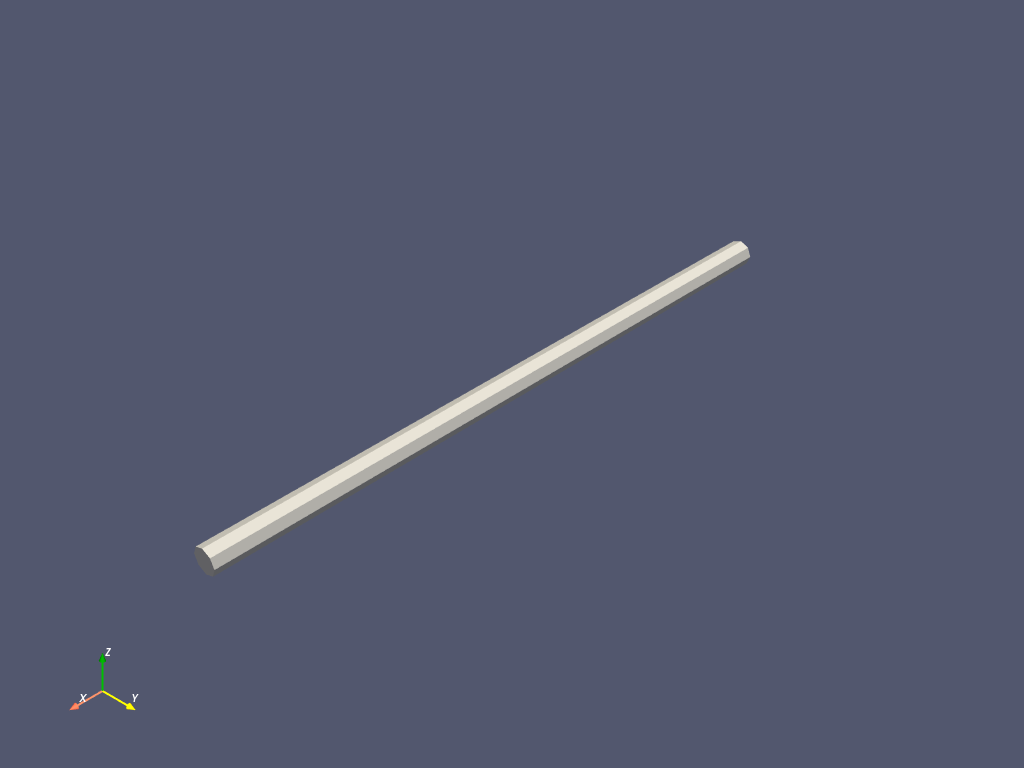

In [7]:
vtk_fiber(**inputs).plot()

**Un mat est un ensemble de fibres** ***distribuées aléatoirement.***.
Par défaut, les fibres sont initialiées avec :
+ des dimensions identiques (*population monodisperse*)[$^{[*]}$](note-1).
+ une distriution uniforme des positions spatiales.
+ une distribution uniforme des positions angulaires dans le plan.
+ des paramètres identiques (*population homogène*)

<a href="note-1"> [*] </a> Le domaine de définition est un cube. Les conditions de bords pourront être périodiques ou non.

In [8]:
# Mat?

,l,b,h,x,y,z,u,v,w,G,E
0,25.0,1.0,1.0,2.440675,8.890827,-24.338157,0.289366,0.957218,-0.0,1.0,625.0
1,25.0,1.0,1.0,10.759468,-11.499601,-24.178519,0.651721,0.758459,0.0,1.0,625.0
2,25.0,1.0,1.0,5.138169,11.759701,-23.967450,0.865730,-0.500512,-0.0,1.0,625.0
3,25.0,1.0,1.0,2.244159,23.109427,-23.766064,0.252040,-0.967717,0.0,1.0,625.0
4,25.0,1.0,1.0,-3.817260,-12.562343,-23.716864,0.957840,-0.287303,0.0,1.0,625.0
...,...,...,...,...,...,...,...,...,...,...,...
95,25.0,1.0,1.0,-15.840432,-0.477060,23.096819,0.128503,0.991709,-0.0,1.0,625.0
96,25.0,1.0,1.0,4.325647,-13.629269,23.645974,0.898537,-0.438898,-0.0,1.0,625.0
97,25.0,1.0,1.0,-23.994623,-12.282176,23.874757,0.900374,-0.435117,-0.0,1.0,625.0
98,25.0,1.0,1.0,16.447001,-22.098542,24.091469,0.051275,-0.998685,-0.0,1.0,625.0


MatplotlibButton(button_style='primary', description='%matplotlib inline', style=ButtonStyle())

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 409.81it/s]


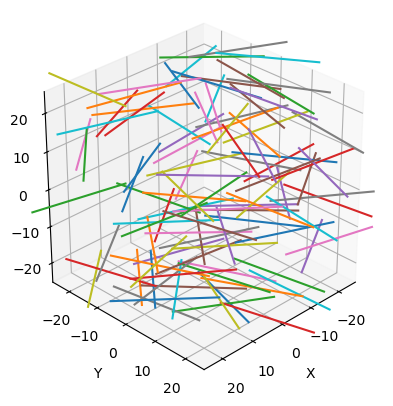

In [9]:
### Generate a set of fibers

# Generate a set of fibers
mat = Mat(**inputs)

display(mat)

# ~~~ Figure ~~~ #
matplotlibButton()

fig, ax = plt.subplots(subplot_kw=dict(projection='3d', aspect='equal',
                                       xlabel="X", ylabel="Y", zlabel="Z"))
ax.view_init(azim=45, elev=30, roll=0)
if len(mat):
    # Draw fibers
    for i in tqdm(range(len(mat))):
        fiber = mat.iloc[i]
        A = fiber[[*"xyz"]].values - 0.5 * fiber.l * fiber[[*"uvw"]].values
        B = fiber[[*"xyz"]].values + 0.5 * fiber.l * fiber[[*"uvw"]].values
        plt.plot(*np.c_[A, B])
    ax.set_xlim(-0.5 * mat.attrs["size"], 0.5 * mat.attrs["size"])
    ax.set_ylim(-0.5 * mat.attrs["size"], 0.5 * mat.attrs["size"])
plt.show()

### 🕸️ Net(work)
<a name="net">

On crée un **réseau** afin de définir les futures intéractions mécaniques entre fibres. La création du réseau permet de définir plus précisemment l'***enchevêtrement des fibres*** (organisation des fibres, structure textile, conditions de périodicité,...).

+ Pour chaque paire de fibres, on calcule la position des **noeuds** les plus proches en résolvant l'équation :
$$
    \mathbb{U} \mathbb{U}^T \cdot \vec{R} = \mathbb{U} \cdot \vec{r}
$$
où $\mathbb{U} = \left[\begin{matrix} \vec{u}_A \\ \vec{u}_B \end{matrix}\right]$ est une matrice de taille (2, 3) dont les lignes sont les vecteurs d'orientation de chaque fibre et $\vec{r} = \vec{X}_B - \vec{X}_A $ est la distance entre les deux fibres.

    Le vecteur solution $\vec{R} = \left(\begin{matrix} -s_A \\ s_B \end{matrix}\right)$ donne les positions $s_A$ et $s_B$ des points les plus proches appartenant à chacune des deux fibres.

+ Une paire de noeuds définit une **connection** et permet de préciser les positions relatives des deux fibres. Chaque connection est idéntifiée de manière unique par les deux fibres concernées et les abscisses curvilignes des noeuds le long de chaque fibre.

In [10]:
# Net?

,A,B,sA,sB,xA,yA,zA,xB,yB,zB
0,0,0,12.500000,-12.500000,6.057752,20.856058,-24.338157,-1.176401,-3.074404,-24.338157
1,0,2,3.938063,-1.799582,3.580217,12.660413,-24.338157,3.580217,12.660413,-23.967450
2,0,3,6.509881,8.253676,4.324414,15.122205,-24.338157,4.324414,15.122205,-23.766064
3,0,5,0.269800,-7.165082,2.518746,9.149084,-24.338157,2.518746,9.149084,-21.802237
4,0,6,-10.466114,6.264470,-0.587864,-1.127531,-24.338157,-0.587864,-1.127531,-21.637518
...,...,...,...,...,...,...,...,...,...,...
862,95,95,12.500000,-12.500000,-14.234141,11.919304,23.096819,-17.446723,-12.873423,23.096819
863,96,96,12.500000,-12.500000,15.557356,-19.115497,23.645974,-6.906063,-8.143040,23.645974
864,97,97,12.500000,-12.500000,-12.739951,-17.721142,23.874757,-35.249295,-6.843209,23.874757
865,98,98,12.500000,-12.500000,17.087939,-34.582099,24.091469,15.806064,-9.614985,24.091469


MatplotlibButton(button_style='primary', description='%matplotlib inline', style=ButtonStyle())

100%|███████████████████████████████████████| 867/867 [00:00<00:00, 1208.50it/s]


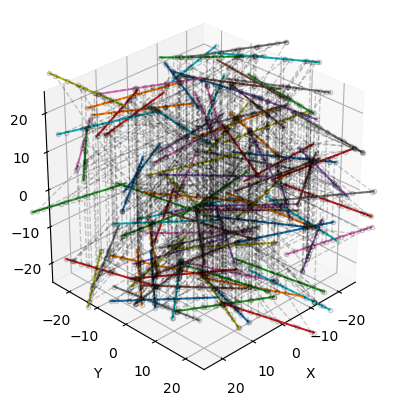

In [11]:
### Build the fiber network

# Generate a set of fibers
mat = Mat(**inputs)
# Build the fiber network
net = Net(mat, **inputs)

display(net)

# Get node data
points = net[["xA", "yA", "zA", "xB", "yB", "zB"]].values.reshape(-1, 2, 3)

# ~~~ Figure ~~~ #
matplotlibButton()

fig, ax = plt.subplots(subplot_kw=dict(projection='3d', aspect='equal',
                                       xlabel="X", ylabel="Y", zlabel="Z"))
ax.view_init(azim=45, elev=30, roll=0)
if len(mat):
    # Draw fibers
    for i in tqdm(range(len(mat))):
        fiber = mat.iloc[i]
        A = fiber[[*"xyz"]].values - 0.5 * fiber.l * fiber[[*"uvw"]].values
        B = fiber[[*"xyz"]].values + 0.5 * fiber.l * fiber[[*"uvw"]].values
        plt.plot(*np.c_[A, B])
if len(net):
    # Draw nodes
    for point in tqdm(points):
        plt.plot(*point.T, '--ok', lw=1, mfc='none', ms=3, alpha=0.2)
ax.set_xlim(-0.5 * net.attrs["size"], 0.5 * net.attrs["size"])
ax.set_ylim(-0.5 * net.attrs["size"], 0.5 * net.attrs["size"])
plt.show()

A partir du réseau, on forme un **empilement** de fibres en laissant tomber les fibres par gravité sur un sol plat.

On suppose que les fibres sont initialement planes et que la chute ne s'effectue que par une translation verticale. Les rotations par basculement ne sont pas considérées. La création de l'empilement se formalise alors comme un problème de programmation linéaire :
$$
        \min_{\mathbf{z}}(-\mathbf{f} \cdot \mathbf{z}) \quad s.t. \quad \mathbb{C} \, \mathbf{z} \leq \mathbf{H} \quad and \quad \mathbf{z} \geq \mathbf{h} / 2
$$
$$
    with \quad \mathbf{f} = -\mathbf{m} \, g \quad and \quad \mathbf{h} > 0
$$
où $\mathbf{f}$ est le vecteur des poids de chaque fibre, $\mathbf{z}$ est le vecteur inconnu des positions verticales de chaque fibre et $\mathbf{f}$ est le vecteur des épaisseurs de fibres. La matrice $\mathbb{C}$ est la matrice des contraintes d'inégalités que doivent vérifier les positions $\mathbf{z}$ pour éviter que les fibres ne se traversent. Le vecteur $-\mathbf{H}$ correspond aux distances minimales entre deux fibres. La condition de non-pénétration entre deux fibres donne l'expression de chaque confition que l'on retrouve dans les lignes de $\mathbb{C}$ et $\mathbf{H}$ :
$$
    z_B - z_A \geq \frac{1}{2} \, (h_A + h_B) \quad \Leftrightarrow \quad z_A - z_B \leq - \, \frac{1}{2} \, (h_A + h_B)
$$

La résolution du problème d'optimisation sous contrainte donne accès aux forces de contacts et aux résultantes des forces appliquées sur chaque fibre.

In [12]:
# Stack?

100%|█████████████████████████████████████████| 94/94 [00:00<00:00, 1267.15it/s]


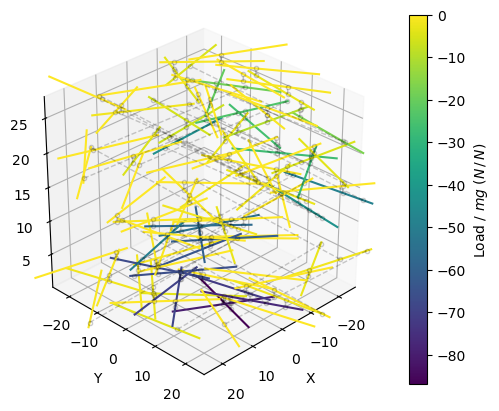

In [13]:
# Generate a set of fibers
mat = Mat(**inputs)
# Build the fiber network
net = Net(mat, **inputs)
# Stack fibers
stack = Stack(mat, net, thresold=None)

C_, f_, H_, h_ = Stack.constraint(mat, net)
linsol = Stack.solve(mat, net)

# Contact force
force = linsol.ineqlin.marginals
# Normalize by fiber weight
force /= np.pi / 4 * mat[[*"lbh"]].prod(axis=1).mean()
# Resulting force
load = 0.5 * force @ np.abs(C_) + 0.5 * force @ C_
color = interp1d([np.min(load), np.max(load)], [0, 1])

points = (stack[stack.A < stack.B][["xA", "yA", "zA", "xB", "yB", "zB"]]
          .values.reshape(-1, 2, 3))

# Figure
fig, ax = plt.subplots(subplot_kw=dict(projection='3d', aspect='equal',
                                       xlabel="X", ylabel="Y", zlabel="Z"))
ax.view_init(azim=45, elev=30, roll=0)
# Draw fibers
for i in tqdm(range(len(mat))):
    fiber = mat.iloc[i]
    A = fiber[[*"xyz"]].values - 0.5 * fiber.l * fiber[[*"uvw"]].values
    B = fiber[[*"xyz"]].values + 0.5 * fiber.l * fiber[[*"uvw"]].values
    plt.plot(*np.c_[A, B], c=plt.cm.viridis(color(load[i])))
# Draw contacts
for point in tqdm(points[~np.isclose(force, 0)]):
    plt.plot(*point.T, '--ok', lw=1, mfc='none', ms=3, alpha=0.2)
ax.set_xlim(-0.5 * mat.attrs["size"], 0.5 * mat.attrs["size"])
ax.set_ylim(-0.5 * mat.attrs["size"], 0.5 * mat.attrs["size"])
# Color bar
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=np.min(load), vmax=np.max(load))
smap = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(smap, ax=ax)
cbar.set_label("Load / $mg$ ($N\,/\,N$)")
plt.show()

### 📐 Mesh
<a name="mesh" />

Le **maillage** représente la ***structure discontinue*** de l'ensemble de fibres. Il regroupe l'ensemble des connections du réseau et les organise par fibre afin de définir :
+ les éléments poutres qui relient deux noeuds adjacents le long d'une même fibre.
+ les élements contraintes qui relient deux noeuds connectés entre deux fibres différentes.

In [14]:
# Mesh?

s          x          y     z  beam  constraint
fiber                                                              
0     0    -12.500000  -1.176401  -3.074404   0.5     1           0
      1    -10.466114  -0.587864  -1.127531   0.5     2          58
      2     -2.947313   1.587823   6.069604   0.5     3         242
      3     -1.655929   1.961505   7.305741   0.5     4         276
      4      0.269800   2.518746   9.149084   0.5     5          44
...               ...        ...        ...   ...   ...         ...
99    1063   3.366705 -22.914775  -6.091735  26.5  1064         754
      1064   6.159453 -21.379789  -8.424815  26.5  1065         684
      1065   7.284437 -20.761462  -9.364634  26.5  1066         810
      1066  11.270660 -18.570503 -12.694751  26.5  1067         986
      1067  12.500000 -17.894817 -13.721749  26.5  1060        1067

[1068 rows x 6 columns]

MatplotlibButton(button_style='primary', description='%matplotlib inline', style=ButtonStyle())

100%|██████████████████████████████████████| 1068/1068 [00:02<00:00, 398.34it/s]


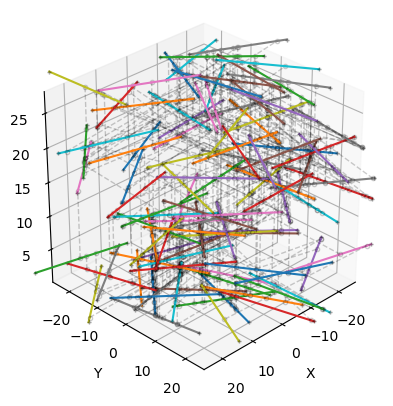

In [15]:
### Create the fiber mesh

# Generate a set of fibers
mat = Mat(**inputs)
# Build the fiber network
net = Net(mat, **inputs)
# Stack fibers
stack = Stack(mat, net, **inputs)
# Create the fiber mesh
mesh = Mesh(stack)

display(mesh.groupby(by="fiber").apply(lambda x: x, include_groups=False))

# ~~~ Figure ~~~ #
matplotlibButton()

fig, ax = plt.subplots(subplot_kw=dict(projection='3d', aspect='equal',
                                       xlabel="X", ylabel="Y", zlabel="Z"))
ax.view_init(azim=45, elev=30, roll=0)
for i, j, k in tqdm(zip(mesh.index, mesh.beam, mesh.constraint),
                    total=len(mesh)):
    a, b, c = mesh.iloc[[i, j, k]][[*"xyz"]].values
    if mesh.iloc[i].s < mesh.iloc[j].s:
        # Draw intra-fiber connections
        plt.plot(*np.c_[a, b],
                 c=plt.cm.tab10(mesh.fiber.iloc[i] % 10))
    if mesh.iloc[i].z < mesh.iloc[k].z:
        # Draw inter-fiber connections
        plt.plot(*np.c_[a, c], '--ok',
                 lw=1, mfc='none', ms=3, alpha=0.2)
    if mesh.iloc[i].fiber == mesh.iloc[k].fiber:
        # Draw fiber end nodes
        plt.plot(*np.c_[a, c], '+k', ms=3, alpha=0.2)
ax.set_xlim(-0.5 * mesh.attrs["size"], 0.5 * mesh.attrs["size"])
ax.set_ylim(-0.5 * mesh.attrs["size"], 0.5 * mesh.attrs["size"])
plt.show()

Create VTK mat: 100%|████████████████████████| 100/100 [00:00<00:00, 295.60it/s]


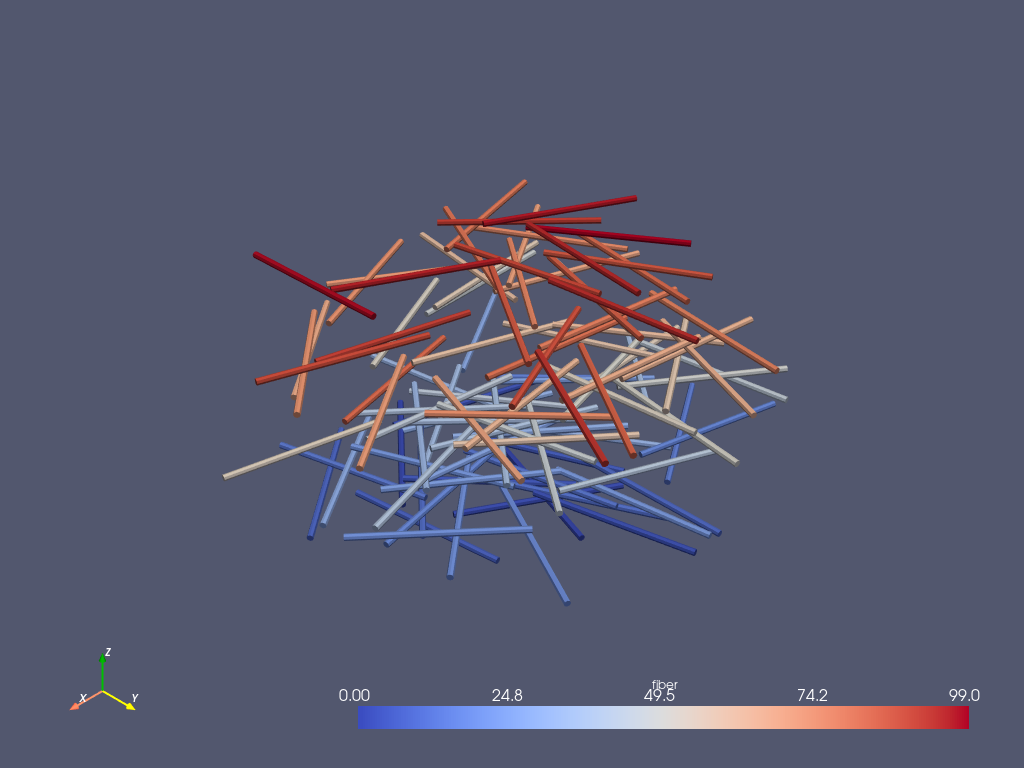

In [16]:
vtk_mat(mat).plot()

## 💻 Code
<a name="code" />

Une fois l'empilement de fibres réalisés et le maillage défini, on peut construire le problème de compaction du réseau fibreux. La ***formulation énergétique*** du problème mécanique est la suivante :
$$
    \min_{\mathbf{u}, \mathbf{f}} \left( \frac{1}{2} \, \mathbf{u} \, \mathbb{K} \, \mathbf{u} - \mathbf{F} \, \mathbf{u} - \mathbf{f} \, (\mathbf{H} - \mathbb{C} \, \mathbf{u}) \right)
    \quad s.t. \quad \mathbb{C} \, \mathbf{u} \leq \mathbf{H} \, , \quad \mathbf{u} \leq 0 \, , \quad \mathbf{f} \geq 0 \quad and \quad \mathbf{f} \, (\mathbf{H} - \mathbb{C} \, \mathbf{u}) = 0
$$
où :
+ $\mathbf{u}$ le vecteur des ***déplacements généralisés*** (inconnus du problèmes).
+ $\mathbf{f}$ le vecteur des ***forces généralisés*** (multiplicateurs de Lagrange).
+ $\mathbb{K}$ la **matrice de raideurs** de l'ensemble de fibres.
+ $\mathbf{F}$ le vecteur des ***efforts externes***.
+ $\mathbb{C}$ la **matrice de contraintes** (conditions de non-pénétration).
+ $\mathbf{H}$ le vecteur des ***espacements entre fibres*** (distances minimales).

L'équilibre mécanique permet de reformuler le problème sous la forme d'un système d'inéquations:
$$
    \Rightarrow \quad \left[\begin{matrix} \mathbb{K} & \mathbb{C}^T \\ \mathbb{C} & 0 \end{matrix}\right] \binom{\mathbf{u}}{\mathbf{f}} \leq \binom{\mathbf{F}}{\mathbf{H}}
$$

### 🔧 Model
<a name="model" />

Le modèle de comportement assemble les matrices de raideurs et de contraintes à partir des données matériaux et du maillage.

+ Le modèle mécanique est construit à partir d'une **loi de poutre de Timoshenko** :
    $$
        \mathbb{K}_e = \frac{Gbh}{l_e} \cdot \frac{\pi / 4}{1 + \frac{G}{E} \left( \frac{l_e}{h} \right)^2}
            \left[\begin{matrix}
                1  &  l_e / 2  &  -1  &  l_e / 2  \\
                l_e / 2  &  {l_e}^2 / 3 + \frac{E}{G} h^2  &  -l_e / 2  &  {l_e}^2 / 6 - \frac{E}{G} h^2  \\
               -1  &  -l_e / 2  &  1  &  -l_e / 2  \\
                l_e / 2  &  {l_e}^2 / 6 - \frac{E}{G} h^2  &  -l_e / 2  &  {l_e}^2 / 3 + \frac{E}{G} h^2  \\
            \end{matrix}\right]
            \ , \quad \mathbf{F}_e =
            \left(\begin{matrix}
                0 \\
                0 \\
                0 \\
                0 \\
            \end{matrix}\right)
    $$
    avec $l_e$ la longueur de l'élément poutre, $E$ le module de Young, $G$ le module de cisaillement, $b$ et $h$ la largeur et l'épaiseur de la fibre.

    Le vecteur des déplacements $\mathbf{u} = (\dots, u_i, \theta_i, \dots)^T$ (avec $u_i$ le déplacement vertical du noeud $i$ et $\theta_i$ la rotation de la section transverse) vérifie l'***équilibre mécanique*** :
    $$
        \mathbb{K} \, \mathbf{u} = \mathbf{F}
    $$

+ Le modèle de contact est construit à partir d'une **condition normale de non-pénétration** :
    $$
        \mathbb{C}_e =
            \left[\begin{matrix}
                 -1  &  0  &  0  &  0  \\
                  1  &  0  & -1  &  0  \\
                  0  &  0  &  1  &  0  \\
            \end{matrix}\right]
            \ , \quad \mathbf{H}_e =
            \left(\begin{matrix}
                z_A - \frac{1}{2} \, h_A \\
                z_B - z_A - \frac{1}{2} \, (h_A + h_B) \\
                Z - z_B - \frac{1}{2} \, h_B \\
            \end{matrix}\right)
    $$
    qui permettent de vérifier les inégalités :
    $$
        \mathbb{C} \, \mathbf{u} \leq \mathbf{H}
    $$

In [17]:
# stiffness?

In [18]:
# constraint?

9.022544641549108e-14


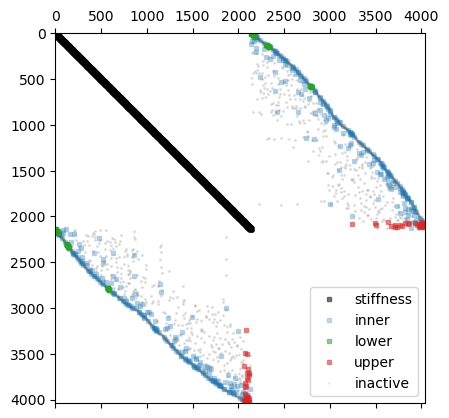

In [19]:
### Display the system of inequations

mat = Mat(**inputs)
net = Net(mat, **inputs)
stack = Stack(mat, net, **inputs)
mesh = Mesh(stack)

K, u, F, du, dF = stiffness(mat, mesh, **inputs)
C, f, H, df, dH = constraint(mat, mesh, **inputs)
plot_system(K, u, F, du, dF, C, f, H, df, dH)
plt.show()

### 🧩 Solver
<a name="solver" />

On résout le problème de minimisation quadratique sous contraintes linéaires suivant :
$$
    \min_{\mathbf{u}, \mathbf{f}} \left( \frac{1}{2} \, \mathbf{u} \, \mathbb{K} \, \mathbf{u} - \mathbf{F} \, \mathbf{u} - \mathbf{f} \, (\mathbf{H} - \mathbb{C} \, \mathbf{u}) \right)
    \quad s.t. \quad \mathbb{C} \, \mathbf{u} \leq \mathbf{H} \, , \quad \mathbf{u} \leq 0 \, , \quad \mathbf{f} \geq 0 \quad and \quad \mathbf{f} \, (\mathbf{H} - \mathbb{C} \, \mathbf{u}) = 0
$$
par une approche de **Lagrangien actualisé**.

Pour une perturbation infinitésimale, le réseau de contacts n'est pas modifié et l'equilibre mécanique se traduit par un ensemble d'équations :
$$
    \Rightarrow \quad \left[\begin{matrix} \mathbb{K} & \mathbb{C}^{*T} \\ \mathbb{C}^* & 0 \end{matrix}\right] \binom{\delta \mathbf{u}}{\delta \mathbf{f}} = \binom{\delta \mathbf{F}}{\delta \mathbf{H}^*}
$$
où $\mathbb{C}^*$ et $\mathbf{H}^*$ correspondent aux lignes de $\mathbb{C}$ et $\mathbf{H}$ pour lesquelles il y a contact : $\mathbb{C}^* \, \mathbf{u} = \mathbf{H}^*$.

La résolution de ce système linéaire permet alors d'exprimer l'évolution des inconnues en fonction d'un paramètre global $U$, le déplacement de la paroi supérieur qui vient compacter l'empilement fibreux.

En connaissant les déplacements infinitésimaux, il est possible de calculer l'incrément de déplacement $\delta U$ nécessaire pour créer un nouveau contact dans le réseau de fibres :
+ on calcule le vecteur des distances entre noeuds : $\mathbf{d} = \mathbf{H} - \mathbb{C} \, \mathbf{u} \geq 0$
+ on calcule le vecteur des pseudo-vitesses entre noeuds : $\mathbf{v} = \frac{d\mathbf{H}}{dU} - \mathbb{C} \, \frac{d\mathbf{u}}{dU} \geq 0$

Le prochain déplacement est alors : $dU = -\min(\mathbf{d} / \mathbf{v}) \leq 0$.

On met ensuite à jour le système d'inéquations avant d'itérer la procédure.

In [20]:
# solver?

In [21]:
inputs()

IntText(value=100, description='N')

FloatText(value=25.0, description='LENGTH', step=5.0)

FloatText(value=1.0, description='WIDTH', step=1.0)

FloatText(value=1.0, description='THICKNESS', step=0.1)

FloatText(value=50.0, description='SIZE', step=10.0)

FloatSlider(value=1.0, description='THETA', max=1.0, readout_format='.1%', step=0.01)

Checkbox(value=True, description='PERIODIC')

FloatText(value=0.99, description='COUPLING', step=0.01)

FloatText(value=3.0, description='PACKING', step=0.5)

FloatLogSlider(value=1000.0, description='ITERMAX', max=6.0, readout_format='.0e', step=1.0)

FloatLogSlider(value=1e-06, description='TOL', max=-1.0, min=-10.0, readout_format='.0e', step=1.0)

Checkbox(value=True, description='VERBOSE')

Packing: 3.0:   8%|██                        | 80/1000 [00:00<00:09, 101.48it/s]


9.022544641549108e-14
6.877593735156627e-13


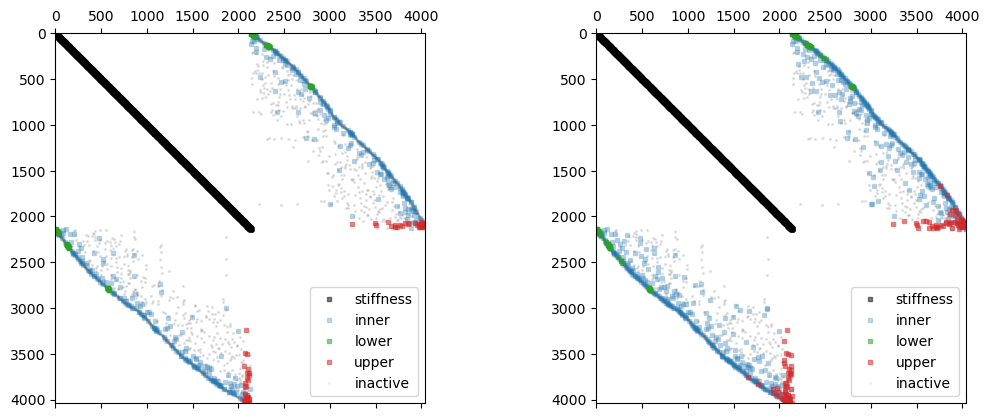

In [22]:
### Solve the mechanical packing problem

# Generate a set of fibers
mat = Mat(**inputs)
# Build the fiber network
net = Net(mat, **inputs)
# Stack fibers
stack = Stack(mat, net, **inputs)
# Create the fiber mesh
mesh = Mesh(stack)

K, u, F, du, dF = stiffness(mat, mesh, **inputs)
C, f, H, df, dH = constraint(mat, mesh, **inputs)

# Solve the mechanical packing problem
K, C, u, f, F, H, Z, rlambda, mask, err = solver(mat, mesh, **inputs)

fig, ax = plt.subplots(1, 2, figsize=(2 * 6.4, 4.8))
plot_system(K, u(0), F(0), du, dF, C, f(0), H(0), df, dH, ax=ax[0])
plot_system(K, u(1), F(1), du, dF, C, f(1), H(1), df, dH, ax=ax[1])
plt.show()

### 🌐 Render
<a name="render" />

In [23]:
# vtk_mesh?

Create VTK mat: 100%|████████████████████████| 100/100 [00:00<00:00, 174.37it/s]


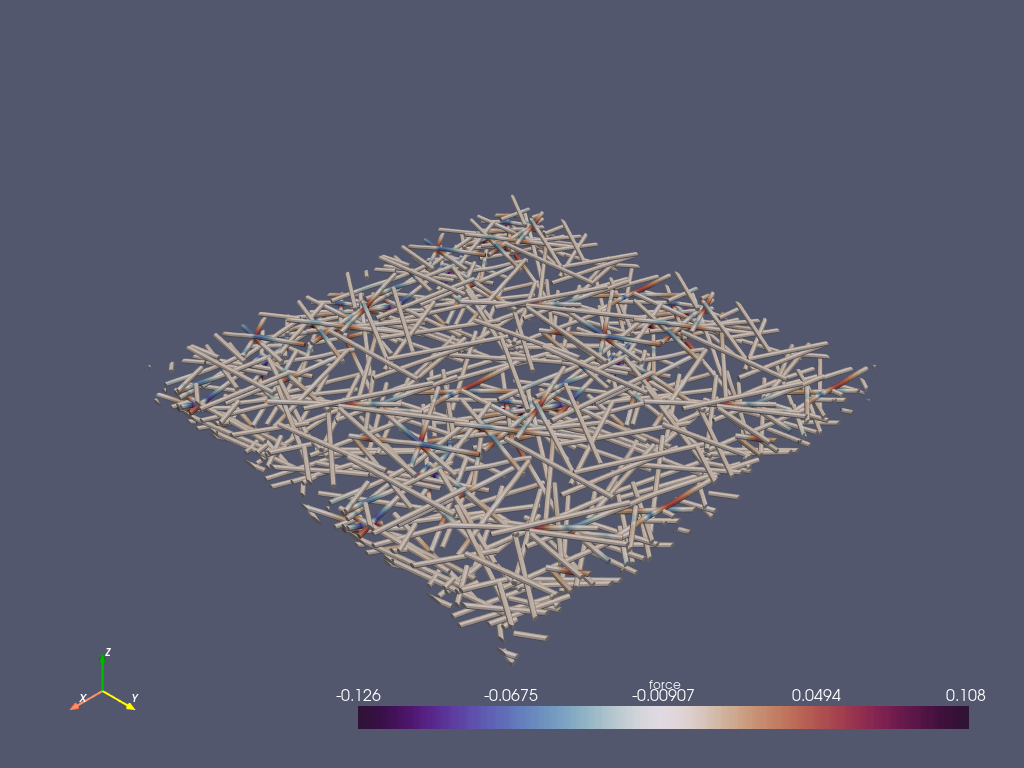

In [24]:
vtk = vtk_mesh(mat, mesh, *u(1).reshape(-1, 2).T, *(f(1) @ C).reshape(-1, 2).T)
vtk.plot(scalars="force", cmap=plt.cm.twilight_shifted)
vtk.save("outputs/vtk.vtk")